## Student Performance Indicator

### Lifecycle of ML Projects

* Understanding the problem
* Data Collection
* Data Checks to Peform
* EDA
* Data Pre-processing
* Model Training
* Choosing the best Model

### 1) Problem Statement

Here we are trying to understand the factors that affects student's grade and make suggestions to the parents accordingly

### 2) Data Collection
Taken from kaggle

#### 2.1 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### 2.2 Import Data File

In [2]:
df = pd.read_csv("notebook/data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

#### 2.3 Data Checks and EDA

In [4]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

**The data is the combination of texts and numbers**

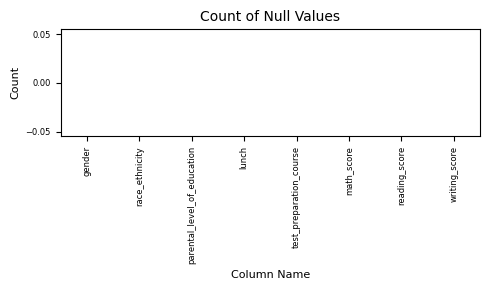

In [5]:
## Checking Null Values
plt.figure(figsize = (5,3))
df.isnull().sum().plot(kind = "bar", color = "red")
plt.title("Count of Null Values", fontsize = 10)
plt.xlabel("Column Name", fontsize = 8)
plt.ylabel("Count", fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.tight_layout()
plt.show()

**There are no null values in any of the columns**

In [6]:
## Check for duplicates
print("Total Number of Duplicate Rows: ",df.duplicated().sum())

Total Number of Duplicate Rows:  0


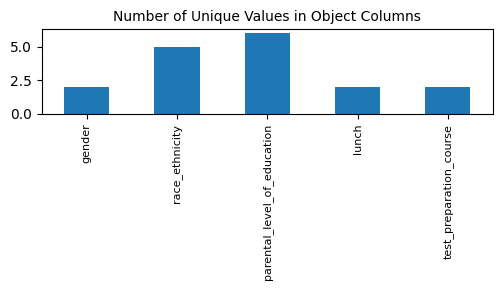

In [7]:
## Number of unique categories present in object type columns
obj_types = df.select_dtypes(include = "object")
plt.figure(figsize = (5,3))
obj_types.nunique().plot(kind = "bar")
plt.xticks(rotation = 90, fontsize = 8)
plt.title("Number of Unique Values in Object Columns", fontsize = 10)
plt.tight_layout()

In [8]:
[print(f"Unique Value in {x}: {sorted(obj_types[x].unique())}\n") for x in obj_types.columns]

Unique Value in gender: ['female', 'male']

Unique Value in race_ethnicity: ['group A', 'group B', 'group C', 'group D', 'group E']

Unique Value in parental_level_of_education: ["associate's degree", "bachelor's degree", 'high school', "master's degree", 'some college', 'some high school']

Unique Value in lunch: ['free/reduced', 'standard']

Unique Value in test_preparation_course: ['completed', 'none']



[None, None, None, None, None]

In [9]:
## Properties of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* There is no significant difference b/w mean and median
* The means of the columns are closer to each other

In [10]:
## Selecting numerical type data
numeric_dtype = df.select_dtypes(include = "number")
numeric_dtype.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


##### Feature Engineering: Adding Columns

In [11]:
df["total_score"] = np.sum(numeric_dtype, axis = 1)
df["average_score"] = np.round(np.average(numeric_dtype, axis = 1),2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [12]:
## Counting Number of Students who scored full marks in any of the subject or have an average score closer to 100
print("Total Number of Students: ", df.shape[0])
print(f'Number of students who have scored 100 in Maths: {len(df[df["math_score"]==100])}')
print(f'Number of students who have scored 100 in Reading: {len(df[df["reading_score"]==100])}')
print(f'Number of students who have scored 100 in Writing: {len(df[df["writing_score"]==100])}')
print(f'Number of students whose average score is above or equal to 95: {len(df[df["average_score"]>=95])}')

Total Number of Students:  1000
Number of students who have scored 100 in Maths: 7
Number of students who have scored 100 in Reading: 17
Number of students who have scored 100 in Writing: 14
Number of students whose average score is above or equal to 95: 22


In [13]:
## Calculating Percentiles
percentiles = [1,10,25, 50, 75]
cols = numeric_dtype.columns

for x in cols:
    print(f"For {x.split('_')[0]}: ")
    for per in percentiles:
        print(f"{per}% of students have scored lesser than {np.round(np.percentile(df[x], per),2)} in {x.split('_')[0]} which is {int(per/100 * len(df))} students")
    print("-"*45)
    
    

For math: 
1% of students have scored lesser than 27.99 in math which is 10 students
10% of students have scored lesser than 47.0 in math which is 100 students
25% of students have scored lesser than 57.0 in math which is 250 students
50% of students have scored lesser than 66.0 in math which is 500 students
75% of students have scored lesser than 77.0 in math which is 750 students
---------------------------------------------
For reading: 
1% of students have scored lesser than 31.99 in reading which is 10 students
10% of students have scored lesser than 51.0 in reading which is 100 students
25% of students have scored lesser than 59.0 in reading which is 250 students
50% of students have scored lesser than 70.0 in reading which is 500 students
75% of students have scored lesser than 79.0 in reading which is 750 students
---------------------------------------------
For writing: 
1% of students have scored lesser than 31.98 in writing which is 10 students
10% of students have scored l

##### Insights

* The worst performance can been seen in mathematics based on the percentile values.
* Students are more comfortable in reading in comparison to maths and writing.

#### Exploratory Data Analysis: Univariate, Bivariate, Multivariate Analysis

In [14]:
## Checking if any numerical cols has infinite value
numeric_dtype = df.select_dtypes(include = "number")
print([f"{x} has {np.isinf(numeric_dtype[x]).sum()} infinite numbers" for x in numeric_dtype.columns])
print("\n")
print([f"{x} has {np.isnan(numeric_dtype[x]).sum()} null value" for x in numeric_dtype.columns])

['math_score has 0 infinite numbers', 'reading_score has 0 infinite numbers', 'writing_score has 0 infinite numbers', 'total_score has 0 infinite numbers', 'average_score has 0 infinite numbers']


['math_score has 0 null value', 'reading_score has 0 null value', 'writing_score has 0 null value', 'total_score has 0 null value', 'average_score has 0 null value']


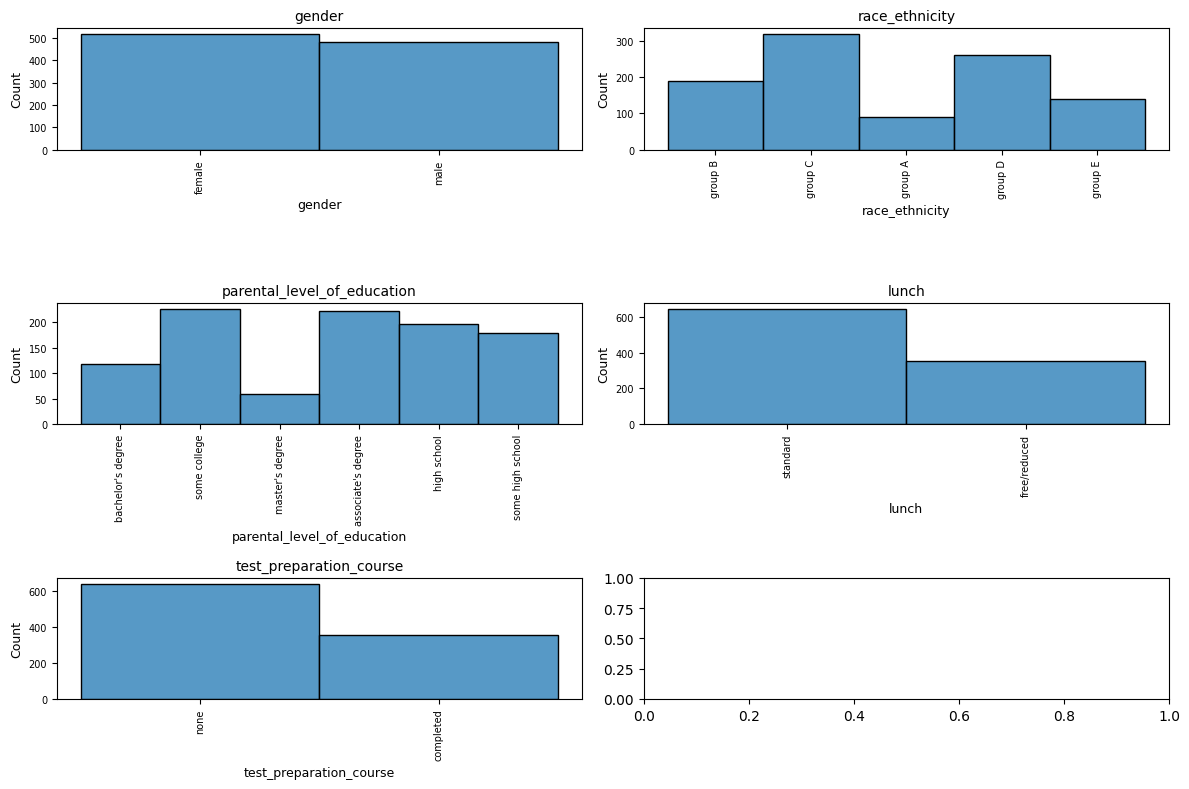

In [15]:
## Analyzing data distribution

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (12,8))
ax = ax.ravel()

for i in range(obj_types.shape[1]):
    sns.histplot(x = obj_types.iloc[:,i], ax = ax[i])
    ax[i].set_title(f"{obj_types.columns[i]}", fontsize = 10)
    ax[i].tick_params(axis = "x", labelrotation = 90, labelsize = 7)
    ax[i].tick_params(axis = "y", labelsize = 7)
    ax[i].set_xlabel(f"{obj_types.columns[i]}", fontsize = 9)
    ax[i].set_ylabel(f"Count", fontsize = 9)

plt.tight_layout()
plt.show()


**Insights**

* The dataset exhibits a nearly equal distribution of male and female students.
* Predominantly, students in the dataset belong to Group C ethnicity, with Group D and Group B following closely.
* A significant portion of parents have attained education at least up to the college level, while a minority hold master's degrees.
* The majority of students opt for a standard lunch.
* A notable proportion of students have not participated in any test preparation courses.

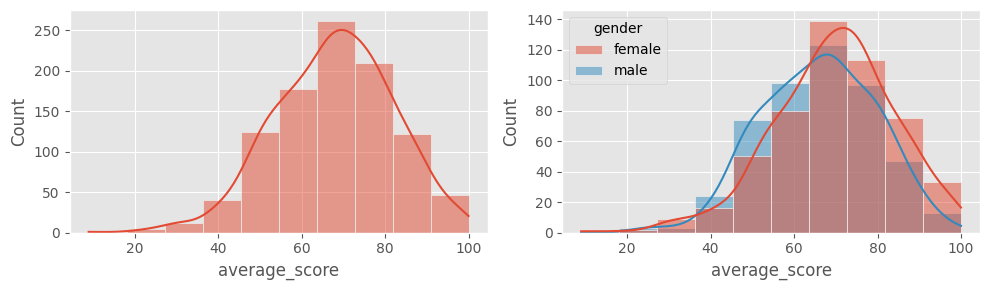

In [16]:
## Relationship Between Gender and Average Score: Checking the Distribution
plt.style.use("ggplot")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))
plt.subplot(121)
sns.histplot(data = df, x = "average_score", bins = 10, stat = "count", kde = True)

plt.subplot(122)
sns.histplot(data = df, x = "average_score", bins = 10, hue = "gender", kde = True)
plt.tight_layout()


**Insights**:

- The number of male students scoring up to 60 marks on average is higher than the number of female students.
- The number of female students scoring above 60 marks on average is higher than the number of male students.

In [17]:
## Number of male and female students scoring above and below 60
under_equal_60 = df[df["average_score"]<=60]
above_60 = df[df["average_score"]>60]
count_under_60 = under_equal_60.groupby(["gender"])["gender"].count()
count_above_60 = above_60.groupby(["gender"])["gender"].count()

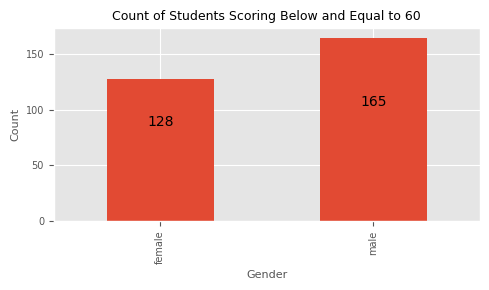

In [18]:
plt.figure(figsize = (5,3))
ax = count_under_60.plot(kind = "bar")
plt.xlabel("Gender", fontsize = 8)
plt.ylabel("Count", fontsize = 8)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.title("Count of Students Scoring Below and Equal to 60", fontsize = 9)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()/2),
               ha = "center", va = "center", xytext = (0, 20), textcoords = "offset points", color = "black")
plt.tight_layout()
plt.show()

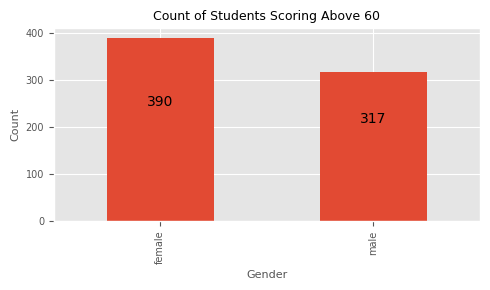

In [19]:
plt.figure(figsize = (5,3))
ax = count_above_60.plot(kind = "bar")
plt.xlabel("Gender", fontsize = 8)
plt.ylabel("Count", fontsize = 8)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.title("Count of Students Scoring Above 60", fontsize = 9)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()/2),
                ha = "center", va = "center", xytext = (0,20), textcoords = "offset points", color = "black")
plt.tight_layout()
plt.show()

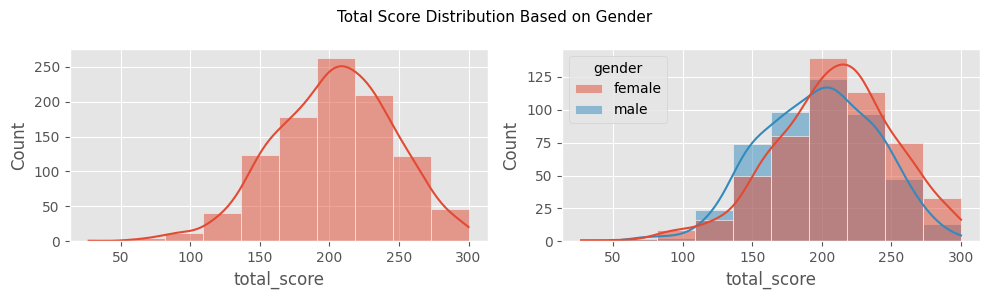

In [20]:
## Score Distribution based on total score and gender

plt.style.use("ggplot")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))
plt.subplot(121)
sns.histplot(data = df, x = "total_score", bins = 10, stat = "count", kde = True)

plt.subplot(122)
sns.histplot(data = df, x = "total_score", bins = 10, hue = "gender", kde = True)
plt.suptitle("Total Score Distribution Based on Gender", fontsize = 11)
plt.tight_layout()



**Insights**

- For total score 200 and above, the number of male students is lesser than female students.


- **In conclusion, girls exhibit stronger academic performance compared to boys, as evidenced by a higher number of girls scoring above 60 marks compared to boys.**

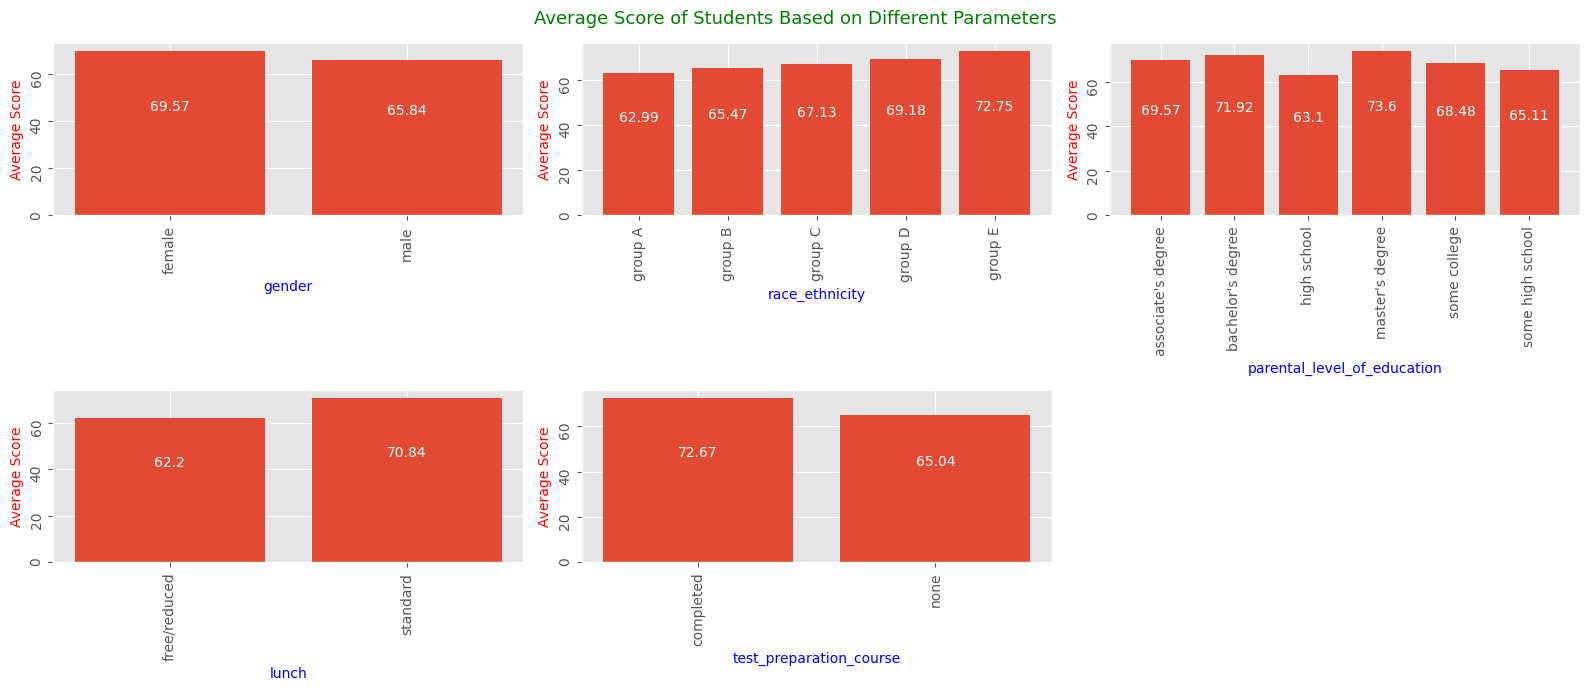

In [21]:
## Effect of different parameters on average score

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16,7))
ax = ax.ravel()

for i in range(obj_types.shape[1]):
    avg_score = df.groupby([obj_types.columns[i]])["average_score"].mean()
    ax[i].bar(avg_score.index, avg_score, )
    ax[i].set_xlabel(obj_types.columns[i], fontsize = 10, color = "blue")
    ax[i].set_ylabel("Average Score", fontsize = 10, color = "red")
    ax[i].tick_params(axis = "x", labelrotation = 90, labelsize = 10)
    ax[i].tick_params(axis = "y", labelrotation = 90, labelsize = 10)
    
    for p in ax[i].patches:
        ax[i].annotate(str(np.round(p.get_height(),2)), (p.get_x() + p.get_width()/2., p.get_height()/2.), 
                   ha = "center", va = "center", textcoords = "offset points", xytext = (0,20), color = "white")

## Removing Unused subplot
for j in range(obj_types.shape[1], len(ax)):
    fig.delaxes(ax[j])


plt.suptitle("Average Score of Students Based on Different Parameters", fontsize = 13, color = "green")    
plt.tight_layout()
plt.show()

**Insights**

1. The average score of females is higher in comparison to males.
2. Students of ethnicity E have the highest average score, followed by those of ethnicity D and C, while ethnicity A has the lowest average score.
3. Parental level of education significantly affects a student's score. Students whose parents hold a master's or bachelor's degree tend to score higher.
4. Students who take standard lunch tend to score higher.
5. Students who have taken a test preparation course score higher.

---

#### Why students from ethnicity A scored less

In [22]:
df_A = df[df["race_ethnicity"] == "group A"]
df_A.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
13,male,group A,some college,standard,completed,78,72,70,220,73.33
14,female,group A,master's degree,standard,none,50,53,58,161,53.67
25,male,group A,master's degree,free/reduced,none,73,74,72,219,73.00
46,female,group A,associate's degree,standard,completed,55,65,62,182,60.67


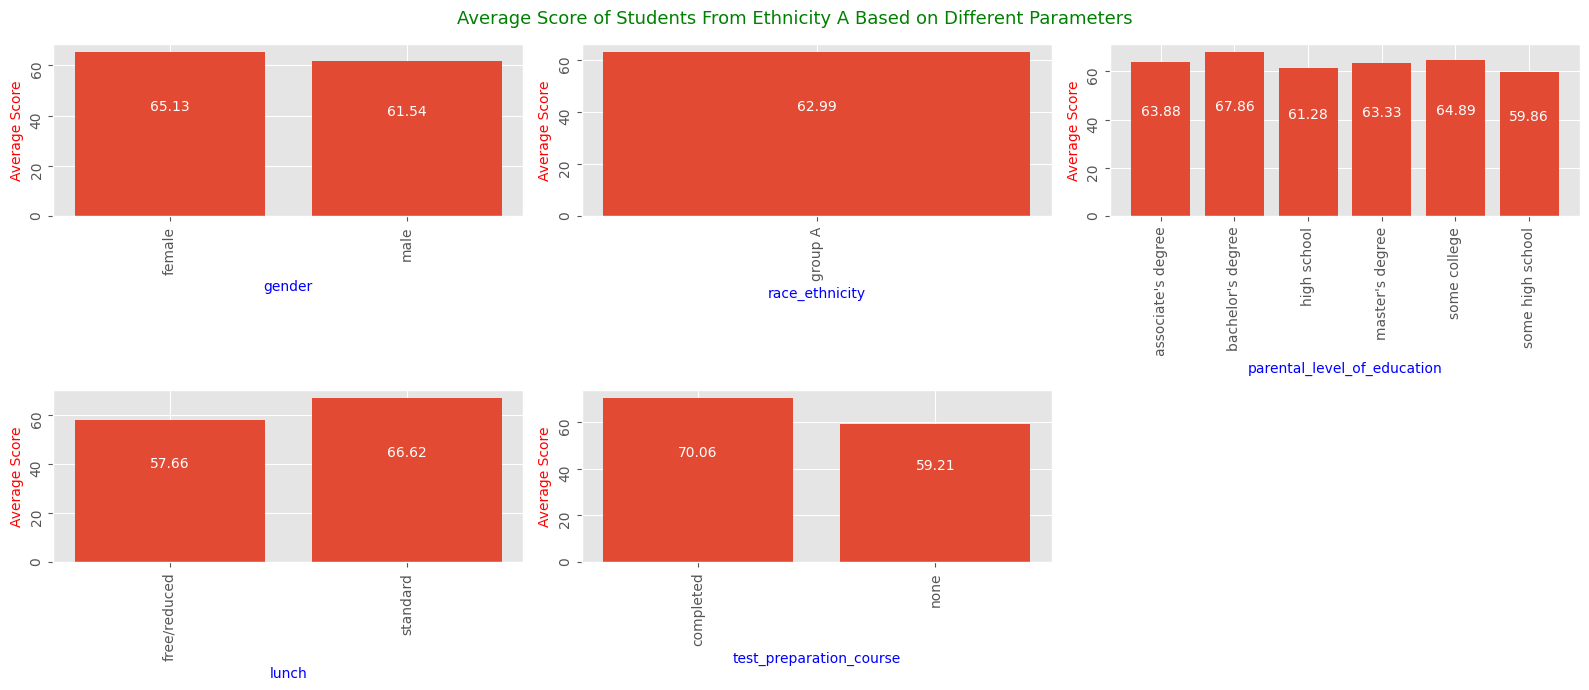

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16,7))
ax = ax.ravel()

for i in range(obj_types.shape[1]):
    avg_score = df_A.groupby([obj_types.columns[i]])["average_score"].mean()
    ax[i].bar(avg_score.index, avg_score, )
    ax[i].set_xlabel(obj_types.columns[i], fontsize = 10, color = "blue")
    ax[i].set_ylabel("Average Score", fontsize = 10, color = "red")
    ax[i].tick_params(axis = "x", labelrotation = 90, labelsize = 10)
    ax[i].tick_params(axis = "y", labelrotation = 90, labelsize = 10)
    
    for p in ax[i].patches:
        ax[i].annotate(str(np.round(p.get_height(),2)), (p.get_x() + p.get_width()/2., p.get_height()/2.), 
                   ha = "center", va = "center", textcoords = "offset points", xytext = (0,20), color = "white")

## Removing Unused subplot
for j in range(obj_types.shape[1], len(ax)):
    fig.delaxes(ax[j])


plt.suptitle("Average Score of Students From Ethnicity A Based on Different Parameters", fontsize = 13, color = "green")    
plt.tight_layout()
plt.show()

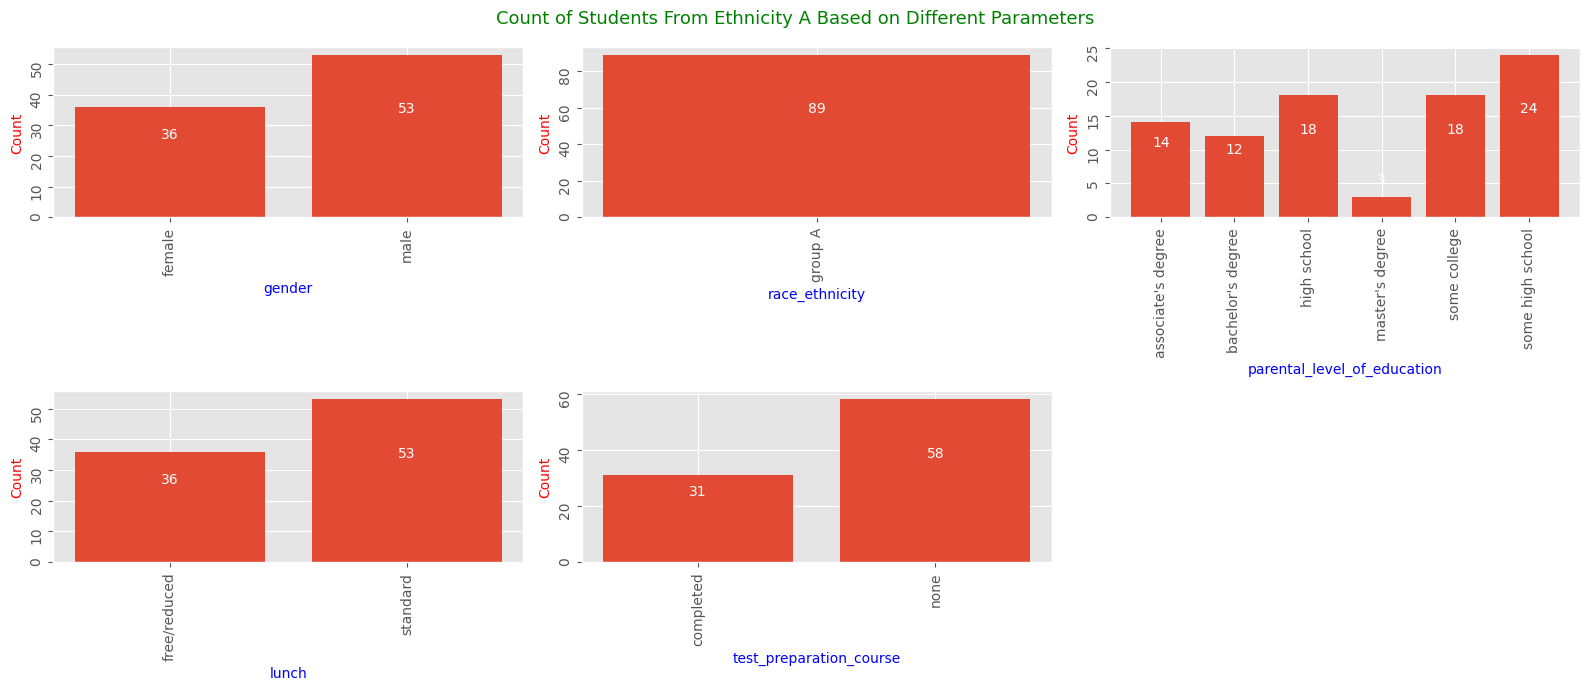

In [24]:
## Count of different categories from Group A

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16,7))
ax = ax.ravel()

for i in range(obj_types.shape[1]):
    avg_score = df_A.groupby([obj_types.columns[i]])["average_score"].count()
    ax[i].bar(avg_score.index, avg_score, )
    ax[i].set_xlabel(obj_types.columns[i], fontsize = 10, color = "blue")
    ax[i].set_ylabel("Count", fontsize = 10, color = "red")
    ax[i].tick_params(axis = "x", labelrotation = 90, labelsize = 10)
    ax[i].tick_params(axis = "y", labelrotation = 90, labelsize = 10)
    
    for p in ax[i].patches:
        ax[i].annotate(str(np.round(p.get_height(),2)), (p.get_x() + p.get_width()/2., p.get_height()/2.), 
                   ha = "center", va = "center", textcoords = "offset points", xytext = (0,20), color = "white")

## Removing Unused subplot
for j in range(obj_types.shape[1], len(ax)):
    fig.delaxes(ax[j])


plt.suptitle("Count of Students From Ethnicity A Based on Different Parameters", fontsize = 13, color = "green")    
plt.tight_layout()
plt.show()


**Insights**

- The number of female students in ethnicity group A is less than that of male students.
- Most parents of students in ethnicity group A have only some high school level of education.
- Most students from ethnicity group A have not taken any test preparation course.
- Considering all the factors mentioned above, it can be inferred that the average score of students in ethnicity group A is lower compared to that of other ethnicities.
---

#### Why did students from Ethnicity E scored the highest?

In [25]:
df_E = df[df["race_ethnicity"] == "group E"]
df_E.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
32,female,group E,master's degree,free/reduced,none,56,72,65,193,64.33
34,male,group E,some college,standard,none,97,87,82,266,88.67
35,male,group E,associate's degree,standard,completed,81,81,79,241,80.33
44,female,group E,associate's degree,free/reduced,none,50,56,54,160,53.33
50,male,group E,some college,standard,none,53,55,48,156,52.00


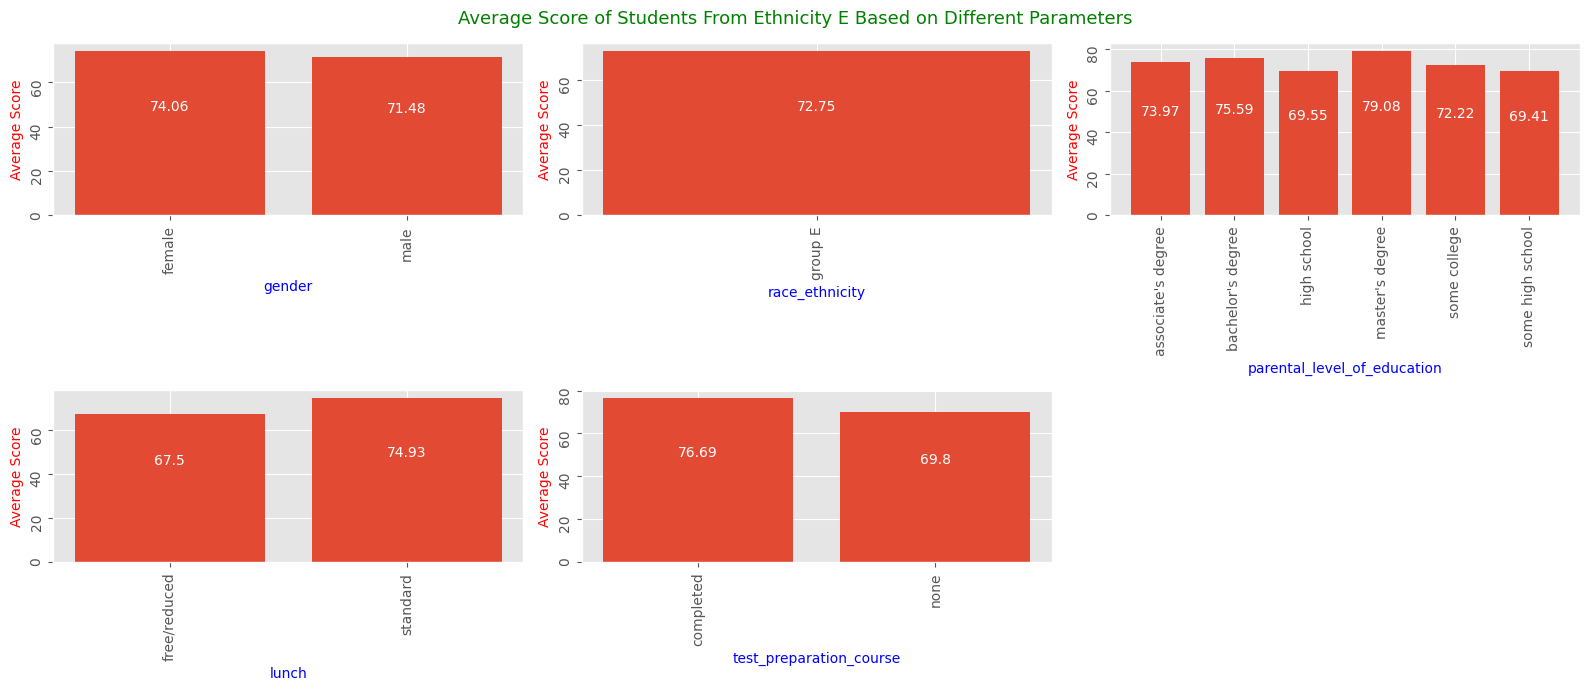

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16,7))
ax = ax.ravel()

for i in range(obj_types.shape[1]):
    avg_score = df_E.groupby([obj_types.columns[i]])["average_score"].mean()
    ax[i].bar(avg_score.index, avg_score, )
    ax[i].set_xlabel(obj_types.columns[i], fontsize = 10, color = "blue")
    ax[i].set_ylabel("Average Score", fontsize = 10, color = "red")
    ax[i].tick_params(axis = "x", labelrotation = 90, labelsize = 10)
    ax[i].tick_params(axis = "y", labelrotation = 90, labelsize = 10)
    
    for p in ax[i].patches:
        ax[i].annotate(str(np.round(p.get_height(),2)), (p.get_x() + p.get_width()/2., p.get_height()/2.), 
                   ha = "center", va = "center", textcoords = "offset points", xytext = (0,20), color = "white")

## Removing Unused subplot
for j in range(obj_types.shape[1], len(ax)):
    fig.delaxes(ax[j])


plt.suptitle("Average Score of Students From Ethnicity E Based on Different Parameters", fontsize = 13, color = "green")    
plt.tight_layout()
plt.show()

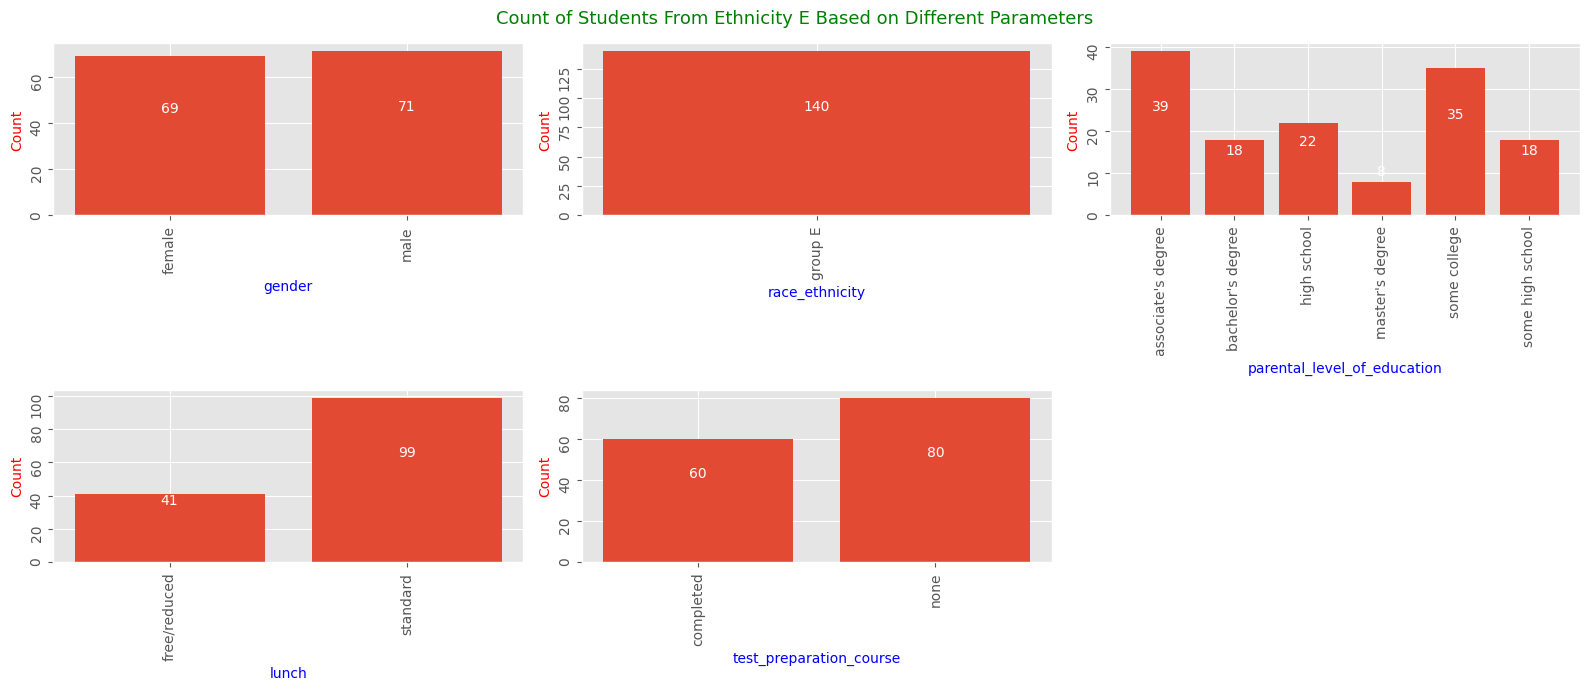

In [27]:
## Count of different categories from Group E

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16,7))
ax = ax.ravel()

for i in range(obj_types.shape[1]):
    avg_score = df_E.groupby([obj_types.columns[i]])["average_score"].count()
    ax[i].bar(avg_score.index, avg_score, )
    ax[i].set_xlabel(obj_types.columns[i], fontsize = 10, color = "blue")
    ax[i].set_ylabel("Count", fontsize = 10, color = "red")
    ax[i].tick_params(axis = "x", labelrotation = 90, labelsize = 10)
    ax[i].tick_params(axis = "y", labelrotation = 90, labelsize = 10)
    
    for p in ax[i].patches:
        ax[i].annotate(str(np.round(p.get_height(),2)), (p.get_x() + p.get_width()/2., p.get_height()/2.), 
                   ha = "center", va = "center", textcoords = "offset points", xytext = (0,20), color = "white")

## Removing Unused subplot
for j in range(obj_types.shape[1], len(ax)):
    fig.delaxes(ax[j])


plt.suptitle("Count of Students From Ethnicity E Based on Different Parameters", fontsize = 13, color = "green")    
plt.tight_layout()
plt.show()


**Insights**

- The proportion of females to males is higher in ethnicity group E compared to ethnicity group A.
- A majority of parents in ethnicity group E have at least attended some college or hold an associate's degree.
- Given the general observation that females tend to perform better academically and students with parents having higher levels of education are likely to excel in studies, it can be inferred that these factors contribute to the better performance of students in ethnicity group E in academics.
---

#### Which category scored the most subject wise

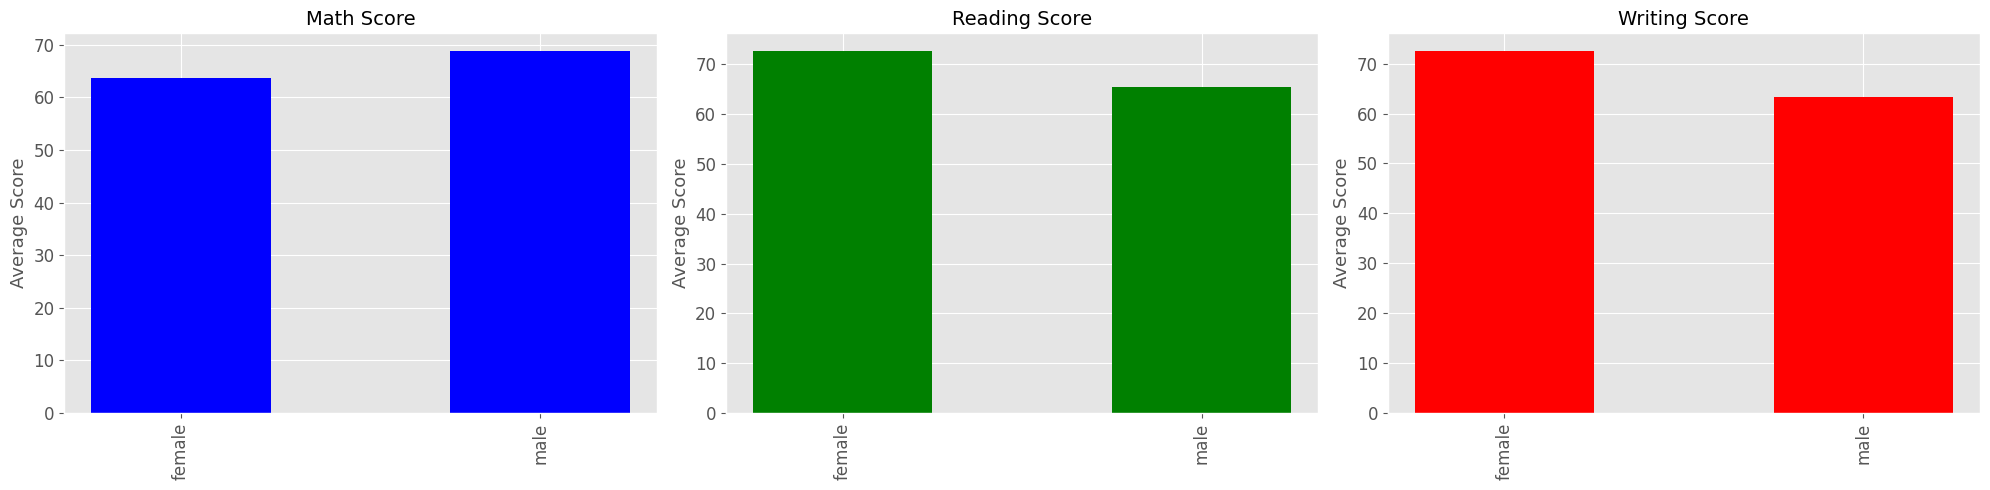

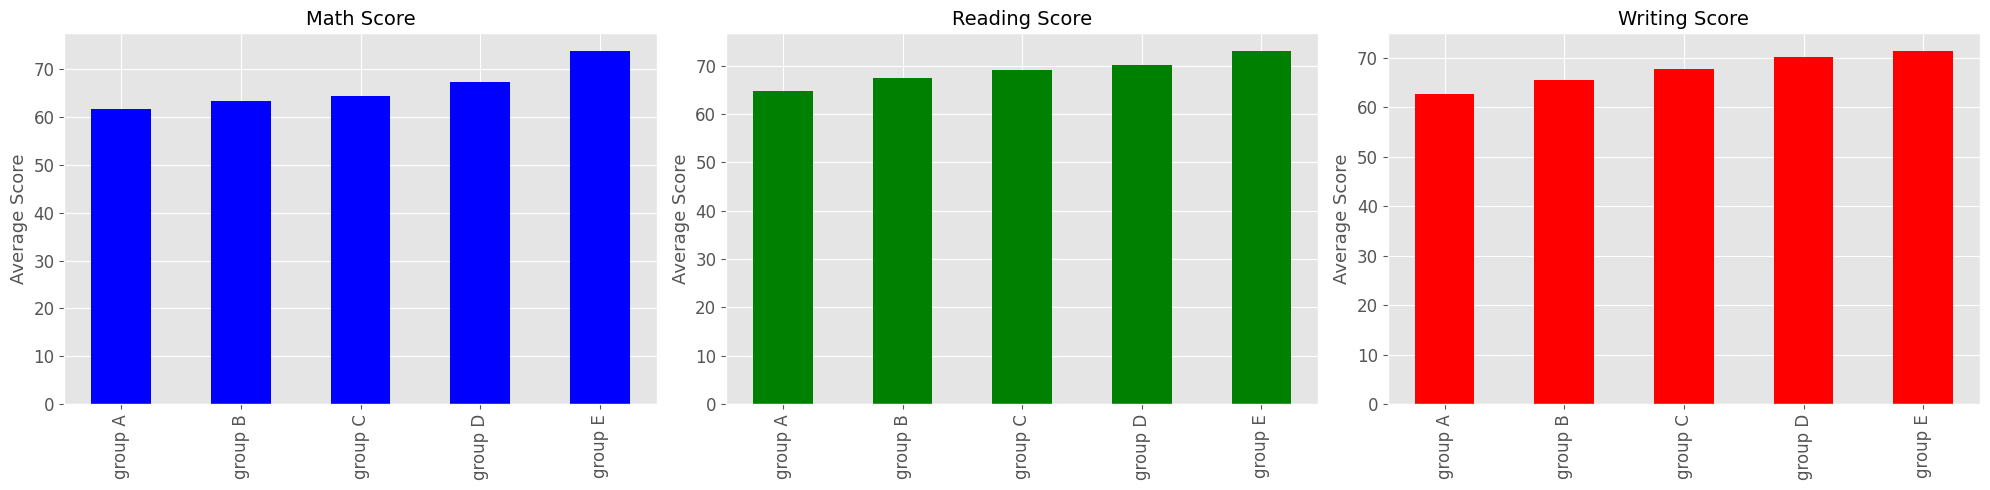

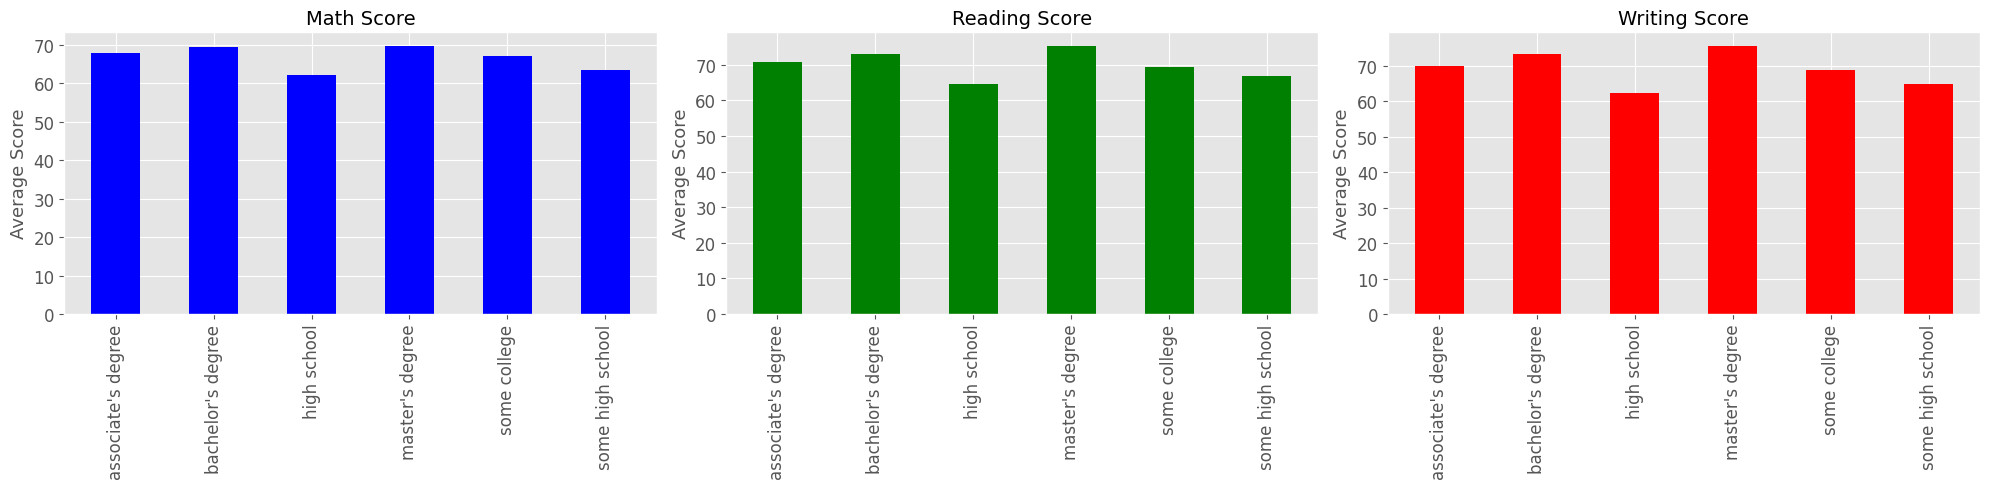

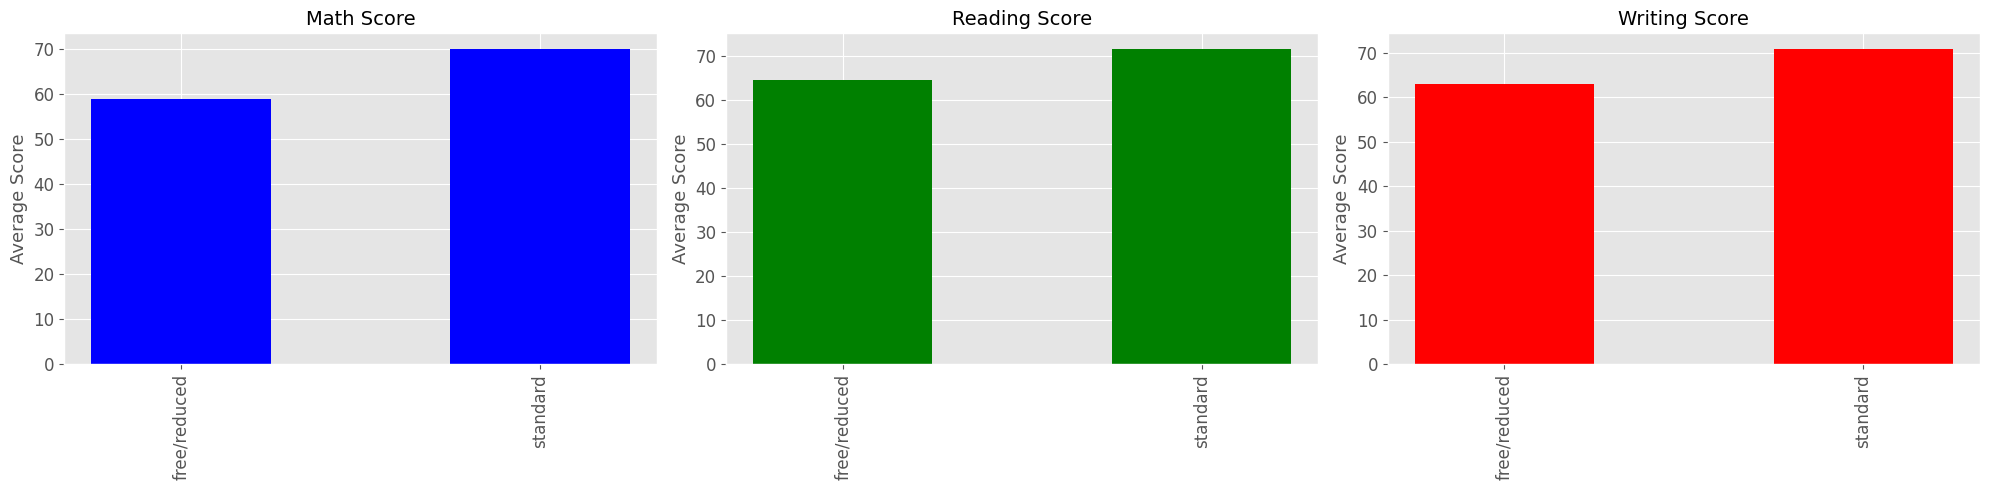

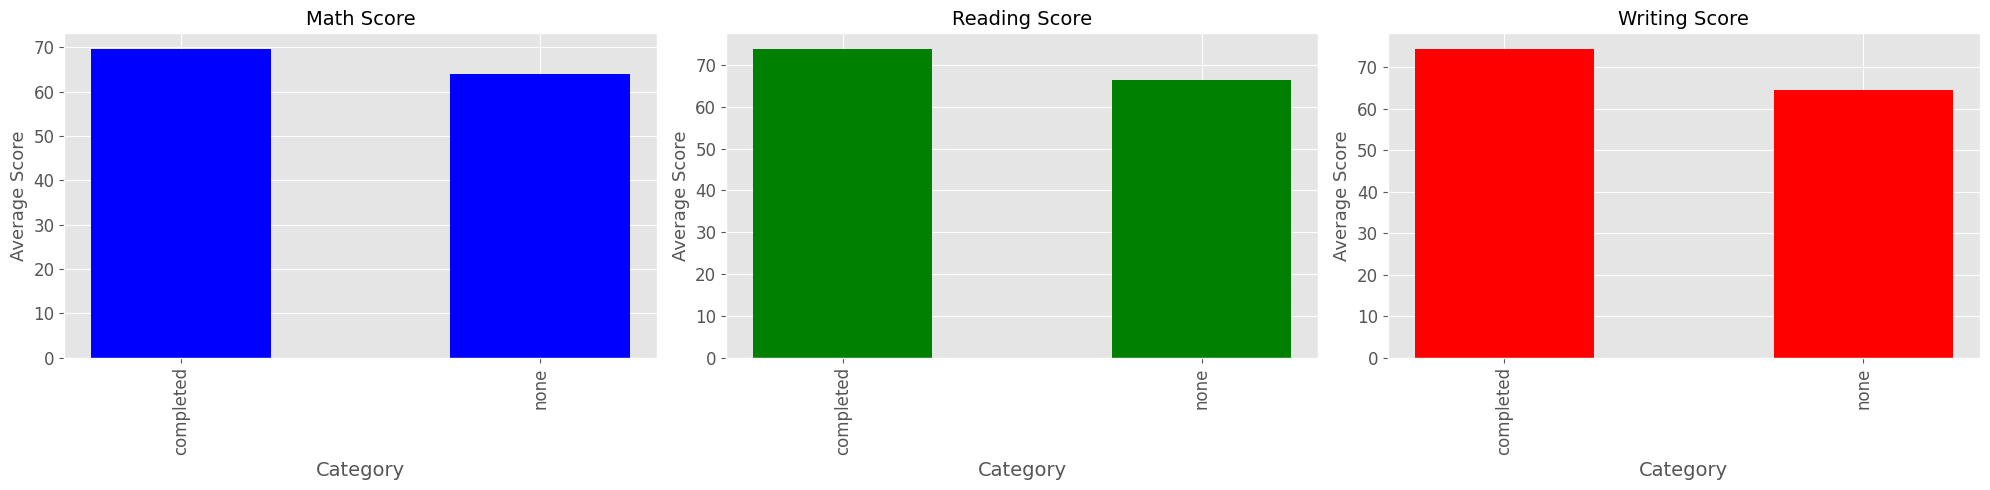

In [28]:
subjects = df.columns[5:8]
colors = ['b', 'g', 'r']
pos = 0
for i in range(len(obj_types.columns)):
    fig, ax = plt.subplots(nrows = 1, ncols = len(subjects), figsize = (20,5))
    ax = ax.ravel()
    for j in range(len(subjects)):
            score = df.groupby(obj_types.columns[i])[subjects[j]].mean()
            color = colors[j%len(colors)]
            ax[j].bar(score.index, score, width = 0.5, color = color)
            ax[j].set_title(str.title(" ".join(subjects[j].split("_"))), fontsize = 14)
            ax[j].tick_params(axis = "x", labelrotation = 90, labelsize = 12)
            ax[j].tick_params(axis = "y", labelsize = 12)
            ax[j].set_ylabel("Average Score", fontsize = 13)
            if i == len(obj_types.columns) - 1:
                ax[j].set_xlabel("Category", fontsize = 14)
                
    plt.tight_layout()
    plt.show()
            
        
            
        

**Insights**

- Male students have scored higher in mathematics than female students on average but lag behind in reading and writing scores.
- Students from ethnicity E are leading in all three subjects.
- Students whose parents have a master's degree or bachelor's degree are leading in all three subjects.
- Students who take standard lunch are leading in all three subjects.
- Students who have completed test preparation courses are leading in all three subjects.
---

#### Final Conclusive Insight

- Female students generally outperform male students academically, particularly in reading and writing, although males tend to score higher in mathematics.
- Students from ethnicity E consistently achieve the highest scores across all subjects.
- The higher performance of students from ethnicity E is likely influenced by:
    1) A higher proportion of female students.
    2) Parents with higher educational attainment.
- Students whose parents have at least a bachelor's degree tend to achieve better academic outcomes.
- Students who opt for standard lunch tend to score higher.
- Students who have completed test preparation courses tend to score higher.
- Students from ethnicity group A underperform, likely due to:
    1) Lower parental education levels.
    2) Lack of test preparation courses.

- These findings highlight the significant impact of gender, ethnicity, parental education, and support mechanisms on student academic performance.

  ---